<a href="https://colab.research.google.com/github/Golden028/Machine_Learning/blob/main/JS07_TG05_2341720216_GOLDEN%20CHRISTIAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 1**

**Step 1 - Install Library**

In [ ]:
# Install ANNOY
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 33.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551809 sha256=a40fa1c2682a3075a75f6062fd469f8ff686cd995d961205492b82196b894037
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


**Step 2 - Import Library**

In [ ]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

**Step 3 - Create a Dummy Dataset**

In [ ]:
# Build Random Dataset and Query Point
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # random value at 100x100 space

# Query point (pick 1 random data point)
query = X[np.random.randint(0, n_points)]

**Step 4 - Exact NN**

In [ ]:
# Compute Exact NN Using Brute Force
# It will visit the data one by one
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 11.167 ms


**Step 5 - Nearest Neighbors with ANNOY**

In [ ]:
# ANNOY 3 Tree
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # find 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")


Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.1132 ms


**Step 6 - Visualize the NN Result**

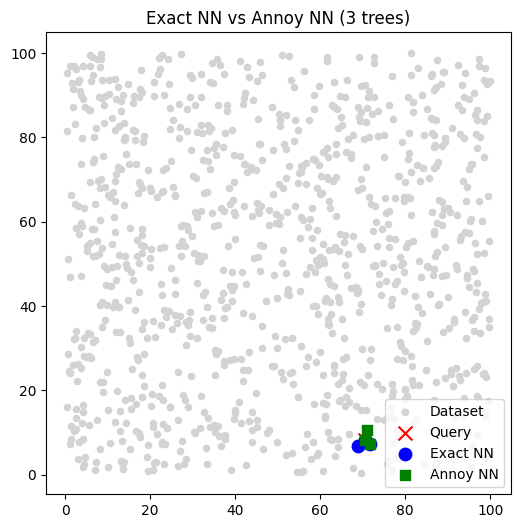

In [ ]:
# Visualize
# Knowing the NN produced by Exact NN and ANNOY
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

# **Lab 2**

**Step 1 - Install FAISS Library**

In [ ]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 63.5 MB/s eta 0:00:00


**Step 2 - Import Libraries**

In [ ]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

**Step 3 - Create a Dummy Dataset**

In [ ]:
# Build random data
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 data 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query point

**Step 4 - Build Exact NN Model**

In [ ]:
# Search NN using Exact NN
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

# Compute Exact NN Time
start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # Find 3 NN
end = time.time()
time_flat = end - start

**Step 5 - Build FAISS Model**

In [ ]:
# Compute FAISS
nlist = 10   # n-cluster (inverted list)
m = 2        # number of subvector
quantizer = faiss.IndexFlatL2(2)   # used by IVF for initiatl cluster
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

**Step 6 - Compare The Performance**

In [ ]:
# Print The Peformances
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.0003457069396972656
Waktu IVF+PQ: 0.00020051002502441406


**Step 7 - Visualize**

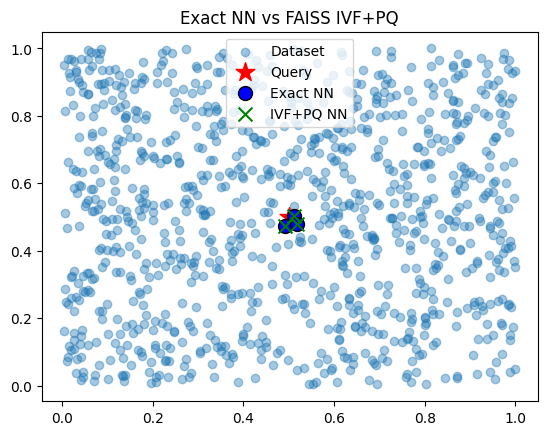

In [ ]:
# Visualize
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Flat NN -> Exact NN
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# IVF+PQ NN -> FAISS
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Exact NN vs FAISS IVF+PQ")
plt.show()

# **Lab 3**

**Step 1 - Install HNSW Library**

In [ ]:
!pip install hnswlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


**Step 2 - Import Libraries**

In [ ]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

**Step 3 - Create a Dummy Dataset**

In [ ]:
# Build Dummy Dataset
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekat

**Step 3 - Build Exact NN Model**

In [ ]:
# Build NN Model
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

# Compute time performace
start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "s")

=== Exact NN ===
Indices: [[830 247 473 913 592]]
Distances: [[0.00993625 0.01363944 0.01646171 0.03779694 0.03859071]]
Waktu: 0.044157981872558594 s


**Step 4 - Build HNSW Model**

In [ ]:
# Initiate Index
p = hnswlib.Index(space='l2', dim=dim)

# Define Max Elements
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Add Data
p.add_items(data)

# Set searching parameter
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "s")


=== HNSW ===
Indices: [[830 247 473 913 592]]
Distances: [[9.8728990e-05 1.8603441e-04 2.7098786e-04 1.4286089e-03 1.4892431e-03]]
Waktu: 0.0001850128173828125 s


# **Lab 4**

Now in this lab, we will compare the 3 ANN method at the single time using large amout of data and features 1mio by 1mio.

In [ ]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# Build 1mio rows with 5D
# ===============================
n_data = 1_000_000   # try 100_000 if you have limited memory
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")

=== Annoy ===
Build time: 22.731465816497803 detik
Query time: 0.00023651123046875 detik
Neighbors: [473142, 815660, 216089, 418503, 261601] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.013669013977050781 detik
Query time: 0.006296396255493164 detik
Neighbors: [473142 815660 216089 418503 261601] ...

=== HNSW (hnswlib) ===
Build time: 163.1844401359558 detik
Query time: 0.0002193450927734375 detik
Neighbors: [473142 815660 216089 418503 261601] ...


# **Lab 5**

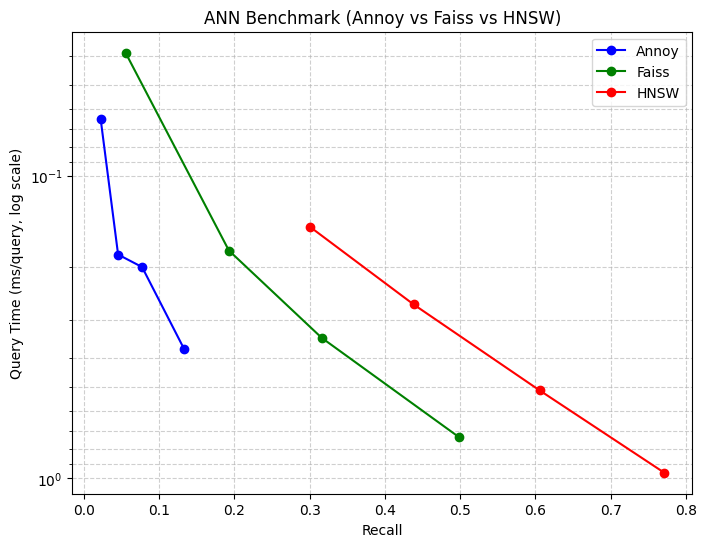

In [ ]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import matplotlib.pyplot as plt

# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

# **Lab Assignment 1**

Perform model performance comparison using ANNOY, FAISS, and HNWH using this following criteria, and fill the performance in term of time of execution.

In [ ]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import pandas as pd

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy_benchmark(nb, d, k=10):
    f = d
    index = AnnoyIndex(f, 'euclidean')
    data = np.random.random((nb, d)).astype('float32')
    query = np.random.random((1000, d)).astype('float32')

    build_start = time.time()
    for i, v in enumerate(data):
        index.add_item(i, v)
    index.build(10)  # 10 trees
    build_time = time.time() - build_start

    # Prepare for querying (Annoy uses vector directly)
    query_vectors = query

    query_start = time.time()
    # Using a loop for multiple queries
    for q_vec in query_vectors:
        index.get_nns_by_vector(q_vec, k)
    query_time = (time.time() - query_start) / 1000 # time per query

    return build_time, query_time

# -------------------------------
# Benchmark FAISS
# -------------------------------
def run_faiss_benchmark(nb, d, k=10):
    data = np.random.random((nb, d)).astype('float32')
    query = np.random.random((1000, d)).astype('float32')

    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, 100, faiss.METRIC_L2) # nlist=100

    build_start = time.time()
    index.train(data)
    index.add(data)
    build_time = time.time() - build_start

    index.nprobe = 10 # nprobe=10
    query_start = time.time()
    _, I = index.search(query, k)
    query_time = (time.time() - query_start) / 1000 # time per query

    return build_time, query_time


# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw_benchmark(nb, d, k=10):
    data = np.random.random((nb, d)).astype('float32')
    query = np.random.random((1000, d)).astype('float32')

    num_elements = nb
    p = hnswlib.Index(space='l2', dim=d)

    build_start = time.time()
    p.init_index(max_elements=num_elements, ef_construction=200, M=16)
    p.add_items(data)
    build_time = time.time() - build_start

    p.set_ef(50) # ef=50
    query_start = time.time()
    p.knn_query(query, k=k)
    query_time = (time.time() - query_start) / 1000 # time per query

    return build_time, query_time

# -------------------------------
# Run benchmark with different parameters and collect results
# -------------------------------
criteria = {
    "1000/2D": (1000, 2),
    "1000/5D": (1000, 5),
    "1000000/2D": (1000000, 2),
    "1000000/5D": (1000000, 5)
}

results = {}

print("Running benchmarks...")
for label, (nb, d) in criteria.items():
    print(f"\nCriterion: {label}")
    np.random.seed(42) # for reproducibility

    print("  Benchmarking Annoy...")
    annoy_build, annoy_query = run_annoy_benchmark(nb, d)
    print(f"    Annoy Build Time: {annoy_build:.4f} s, Query Time (per query): {annoy_query:.6f} s")


    print("  Benchmarking FAISS...")
    faiss_build, faiss_query = run_faiss_benchmark(nb, d)
    print(f"    FAISS Build Time: {faiss_build:.4f} s, Query Time (per query): {faiss_query:.6f} s")


    print("  Benchmarking HNSW...")
    hnsw_build, hnsw_query = run_hnsw_benchmark(nb, d)
    print(f"    HNSW Build Time: {hnsw_build:.4f} s, Query Time (per query): {hnsw_query:.6f} s")

    results[label] = {
        "Annoy Build Time (s)": annoy_build,
        "Annoy Query Time (s/query)": annoy_query,
        "FAISS Build Time (s)": faiss_build,
        "FAISS Query Time (s/query)": faiss_query,
        "HNSW Build Time (s)": hnsw_build,
        "HNSW Query Time (s/query)": hnsw_query
    }

# -------------------------------
# Display results in a table
# -------------------------------
df_results = pd.DataFrame.from_dict(results, orient='index')
df_results = df_results[['Annoy Build Time (s)', 'Annoy Query Time (s/query)',
                         'FAISS Build Time (s)', 'FAISS Query Time (s/query)',
                         'HNSW Build Time (s)', 'HNSW Query Time (s/query)']]

print("\n--- Performance Comparison Table ---")
display(df_results)

Running benchmarks...

Criterion: 1000/2D
  Benchmarking Annoy...
    Annoy Build Time: 0.0440 s, Query Time (per query): 0.000031 s
  Benchmarking FAISS...
    FAISS Build Time: 0.0465 s, Query Time (per query): 0.000005 s
  Benchmarking HNSW...
    HNSW Build Time: 0.0955 s, Query Time (per query): 0.000012 s

Criterion: 1000/5D
  Benchmarking Annoy...
    Annoy Build Time: 0.0287 s, Query Time (per query): 0.000030 s
  Benchmarking FAISS...
    FAISS Build Time: 0.0596 s, Query Time (per query): 0.000006 s
  Benchmarking HNSW...
    HNSW Build Time: 0.1070 s, Query Time (per query): 0.000024 s

Criterion: 1000000/2D
  Benchmarking Annoy...
    Annoy Build Time: 27.3730 s, Query Time (per query): 0.000066 s
  Benchmarking FAISS...
    FAISS Build Time: 0.3699 s, Query Time (per query): 0.000819 s
  Benchmarking HNSW...
    HNSW Build Time: 97.9289 s, Query Time (per query): 0.000016 s

Criterion: 1000000/5D
  Benchmarking Annoy...
    Annoy Build Time: 22.6101 s, Query Time (per quer

,Annoy Build Time (s),Annoy Query Time (s/query),FAISS Build Time (s),FAISS Query Time (s/query),HNSW Build Time (s),HNSW Query Time (s/query)
1000/2D,0.043991,0.000031,0.046488,0.000005,0.095502,0.000012
1000/5D,0.028699,0.000030,0.059635,0.000006,0.107043,0.000024
1000000/2D,27.373050,0.000066,0.369947,0.000819,97.928919,0.000016
1000000/5D,22.610120,0.000050,0.188228,0.000501,159.969480,0.000053


# **Lab Assignment 2**

Conduct an experiment using Annoy, FAISS, and HNSWLIB on a large secondary dataset (Micro Spotify) available at the following link:
👉 https://www.kaggle.com/datasets/bwandowando/**spotify**-songs-with-attributes-and-lyrics/data


1. Download the data and load the CSV file (select the first dataset of the two available).
2. Select only the numerical features, and normalize them using StandardScaler.
3. Perform nearest track search and compare the results.
4. Compare the performance among Exact NN, Annoy, FAISS, and HNSW.

**Boilerplate**

Use this following code as starter. It is already include with feature selection and simple preprocessing.


```
import pandas as pd
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Load dataset
# -------------------------------
df = pd.read_csv('spotify_songs.csv')  # ganti path sesuai lokasi file
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features].values

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10  # jumlah nearest neighbors
```




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

CSV = '/content/drive/MyDrive/ML/songs_with_attributes_and_lyrics10.csv'  # sesuaikan path
FEATURES = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

df = pd.read_csv(CSV)
A = df[FEATURES].values  # original array (float64)
print("Loaded rows:", A.shape[0], "features:", A.shape[1])


Loaded rows: 955320 features: 9


In [ ]:
scaler = StandardScaler()
A_scaled = scaler.fit_transform(A)  # tetap float64 for now

print("Scaled feature sample : ", A_scaled[:5])
print("Shape : ", A_scaled.shape)


Scaled feature sample :  [[-0.7993069  -0.19864811 -0.87638549 -0.28127217 -0.90379193  3.55339717
   1.28005204 -1.17358297 -0.75050368]
 [ 1.39759768 -0.01859905 -0.34315988  2.48965792  1.97895487 -0.38476917
  -0.22552979 -0.79977796 -1.4297021 ]
 [-3.24358412 -2.58367008 -3.24821096 -0.90002355  2.00461236 -0.38476917
   1.32088138 -1.94107622 -4.13816703]
 [ 0.62603066  0.96120282  0.39391508 -0.48572915 -0.88377909 -0.38470949
  -0.8818614   1.79299717  0.04610963]
 [ 0.63781031  1.00726188 -0.18387785 -0.45775082 -0.61180974 -0.38467941
  -0.8512394   1.84071696  0.04651591]]
Shape :  (955320, 9)


In [ ]:
from sklearn.neighbors import NearestNeighbors
import time as tm

K = 10
Q_IDX = 100
q_vec = A_scaled[Q_IDX].reshape(1, -1)

t0 = tm.perf_counter()
nn = NearestNeighbors(n_neighbors=K, algorithm='brute', metric='euclidean')
nn.fit(A_scaled)
dists_exact, inds_exact = nn.kneighbors(q_vec)
t_exact = tm.perf_counter() - t0

print("Exact NN indices:", inds_exact)
print("Exact NN distances:", dists_exact)
print("Exact NN time:", t_exact, "seconds")


Exact NN indices: [[   100 814549 250273 354470 793977 683626 843918  14210 365044 819999]]
Exact NN distances: [[0.         1.29201942 1.40137289 1.65303427 1.67632189 1.73909912
  1.74027484 1.7628803  1.77549768 1.79298379]]
Exact NN time: 0.2016360359993996 seconds


In [ ]:
from annoy import AnnoyIndex
import time as tm

dim = A_scaled.shape[1]
ann = AnnoyIndex(dim, metric='euclidean')

t0 = tm.perf_counter()
for i in range(A_scaled.shape[0]):
    ann.add_item(i, A_scaled[i].tolist())
ann.build(n_trees=10)
build_time_annoy = tm.perf_counter() - t0

tq0 = tm.perf_counter()
ann_result = ann.get_nns_by_vector(q_vec.flatten().tolist(), K, include_distances=True)
ann_query_time = tm.perf_counter() - tq0

# ann_result is (indices_list, distances_list)
print("Annoy neighbors:", ann_result[0])
print("Annoy build time:", build_time_annoy)
print("Annoy query time:", ann_query_time)


Annoy neighbors: [100, 814549, 250273, 354470, 683626, 365044, 819999, 259765, 67613, 905898]
Annoy build time: 15.98756251300074
Annoy query time: 0.0002619639999466017


In [ ]:
import faiss
import time as tm

# FAISS requires float32
B = A_scaled.astype(np.float32)
dim = B.shape[1]
index = faiss.IndexFlatL2(dim)

t0 = tm.perf_counter()
index.add(B)
build_time_faiss = tm.perf_counter() - t0

tq0 = tm.perf_counter()
d_faiss, i_faiss = index.search(q_vec.astype(np.float32), K)
faiss_query_time = tm.perf_counter() - tq0

print("FAISS neighbors:", i_faiss[0])
print("FAISS build time:", build_time_faiss)
print("FAISS query time:", faiss_query_time)


FAISS neighbors: [   100 814549 250273 354470 793977 683626 843918  14210 365044 819999]
FAISS build time: 0.057382621000215295
FAISS query time: 0.007922804999907385


In [ ]:
import hnswlib
import time as tm

# ensure float32 for hnswlib too
C = A_scaled.astype(np.float32)
dim = C.shape[1]
p = hnswlib.Index(space='l2', dim=dim)

t0 = tm.perf_counter()
p.init_index(max_elements=C.shape[0], ef_construction=200, M=16)
p.add_items(C, np.arange(C.shape[0]))
build_time_hnsw = tm.perf_counter() - t0

p.set_ef(50)
tq0 = tm.perf_counter()
labels, dists = p.knn_query(q_vec.astype(np.float32), k=K)
hnsw_query_time = tm.perf_counter() - tq0

print("HNSW neighbors:", labels[0])
print("HNSW build time:", build_time_hnsw)
print("HNSW query time:", hnsw_query_time)


HNSW neighbors: [   100 814549 250273 354470 793977 683626 843918  14210 365044 819999]
HNSW build time: 195.69657755400112
HNSW query time: 0.00040077899939205963


In [ ]:
import pandas as pd

results = {
    'Method': ['Exact NN', 'Annoy', 'FAISS', 'HNSW'],
    'Build Time': [t_exact, build_time_annoy, build_time_faiss, build_time_hnsw],
    'Query Time': [t_exact, ann_query_time, faiss_query_time, hnsw_query_time]
}

df_results = pd.DataFrame(results)
print(df_results)


     Method  Build Time  Query Time
0  Exact NN    0.201636    0.201636
1     Annoy   15.987563    0.000262
2     FAISS    0.057383    0.007923
3      HNSW  195.696578    0.000401
